In [74]:
import geopandas as gpd

In [75]:
file_name = "VA_Ghost_CName.json"
ghost = gpd.read_file(file_name)

In [76]:
ghost.head(10)

,CName,geometry
0,va-ghost-1,"POLYGON ((-78.63862 38.29071, -78.63919 38.290..."
1,va-ghost-2,"POLYGON ((-78.66981 38.24737, -78.66981 38.247..."
2,va-ghost-3,"POLYGON ((-78.61897 38.30346, -78.61810 38.303..."
3,va-ghost-4,"POLYGON ((-78.49940 38.39960, -78.49912 38.400..."
4,va-ghost-5,"POLYGON ((-78.49318 38.40651, -78.49314 38.406..."
5,va-ghost-6,"POLYGON ((-78.48746 38.41551, -78.48672 38.416..."
6,va-ghost-7,"POLYGON ((-78.48586 38.42160, -78.48587 38.421..."
7,va-ghost-8,"POLYGON ((-78.47780 38.43173, -78.47719 38.431..."
8,va-ghost-9,"POLYGON ((-78.47773 38.43820, -78.47772 38.438..."
9,va-ghost-10,"POLYGON ((-78.46257 38.45832, -78.46259 38.458..."


In [77]:
county = gpd.read_file("VA_County_Cleaned.json")

In [78]:
county.head()

,County,geometry
0,Accomack County,"POLYGON ((-75.62204 37.45679, -75.62465 37.457..."
1,Albemarle County,"POLYGON ((-78.36880 38.18409, -78.36476 38.183..."
2,Alexandria City,"POLYGON ((-77.04631 38.84120, -77.04621 38.840..."
3,Alleghany County,"POLYGON ((-79.64759 37.87454, -79.64739 37.874..."
4,Amelia County,"POLYGON ((-77.85531 37.41843, -77.85519 37.418..."


In [79]:
'''
c = list(county.columns)
c.remove("CNTY_NM")
c.remove("geometry")
county.drop(columns=c, axis=1, inplace=True)
county.head()
'''

'\nc = list(county.columns)\nc.remove("CNTY_NM")\nc.remove("geometry")\ncounty.drop(columns=c, axis=1, inplace=True)\ncounty.head()\n'

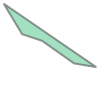

In [80]:
ghost.loc[120].geometry

In [81]:
'''
ghost = ghost.to_crs("EPSG:3857")
for index, row in ghost.iterrows():
    ga = row["geometry"].area
    if ga < 8000:
        print(index, row["geometry"].area)
ghost = ghost.to_crs("EPSG:4326")
'''

'\nghost = ghost.to_crs("EPSG:3857")\nfor index, row in ghost.iterrows():\n    ga = row["geometry"].area\n    if ga < 8000:\n        print(index, row["geometry"].area)\nghost = ghost.to_crs("EPSG:4326")\n'

In [83]:
def normalize(string):
    splited = string.split(" ")
    if splited[1] != "County":
        return ''.join(splited)
    else:
        return splited[0]

In [86]:
ghost["County"] = ""
for index, row in ghost.iterrows():
    g = row["geometry"]
    for index2, row2 in county.iterrows():
        g2 = row2["geometry"]
        if g.intersects(g2):
            ghost.at[index, "County"] = "va-" + normalize(row2["County"]).lower()
            print("#", end="")
            
ghost.head()

#########################################################################################################################################################################################################################################################################################################################################

,CName,geometry,County
0,va-ghost-1,"POLYGON ((-78.63862 38.29071, -78.63919 38.290...",va-rockingham
1,va-ghost-2,"POLYGON ((-78.66981 38.24737, -78.66981 38.247...",va-rockingham
2,va-ghost-3,"POLYGON ((-78.61897 38.30346, -78.61810 38.303...",va-rockingham
3,va-ghost-4,"POLYGON ((-78.49940 38.39960, -78.49912 38.400...",va-rockingham
4,va-ghost-5,"POLYGON ((-78.49318 38.40651, -78.49314 38.406...",va-rockingham


In [89]:
ghost.to_csv("VA_Ghost_County.csv", index=False)

In [87]:
ghost.drop(columns=["geometry"], axis=1, inplace=True)
ghost.head(100)

,CName,County
0,va-ghost-1,va-rockingham
1,va-ghost-2,va-rockingham
2,va-ghost-3,va-rockingham
3,va-ghost-4,va-rockingham
4,va-ghost-5,va-rockingham
...,...,...
95,va-ghost-96,va-princegeorgecounty
96,va-ghost-97,va-henrico
97,va-ghost-98,va-henrico
98,va-ghost-99,va-fairfax


In [69]:
a = gpd.read_file("../../all_states_precincts_cname_neighbor_demo_OG_anomalous_fixNeighborVA.json")
a = a[a["State"] == "va"]

In [71]:
a["County"].unique()

array(['Accomack', 'Albemarle', 'AlexandriaCity', 'Alleghany', 'Amelia',
       'Amherst', 'Appomattox', 'Arlington', 'Augusta', 'Bath', 'Bedford',
       'Bland', 'Botetourt', 'BristolCity', 'Brunswick', 'Buchanan',
       'Buckingham', 'BuenaVistaCity', 'Campbell', 'Caroline', 'Carroll',
       'CharlesCityCounty', 'Charlotte', 'CharlottesvilleCity',
       'ChesapeakeCity', 'Chesterfield', 'Clarke', 'ColonialHeightsCity',
       'CovingtonCity', 'Craig', 'Culpeper', 'Cumberland', 'DanvilleCity',
       'Dickenson', 'Dinwiddie', 'EmporiaCity', 'Essex', 'Fairfax',
       'FairfaxCity', 'FallsChurchCity', 'Fauquier', 'Floyd', 'Fluvanna',
       'Franklin', 'FranklinCity', 'Frederick', 'FredericksburgCity',
       'GalaxCity', 'Giles', 'Gloucester', 'Goochland', 'Grayson',
       'Greene', 'Greensville', 'Halifax', 'HamptonCity', 'Hanover',
       'HarrisonburgCity', 'Henrico', 'Henry', 'Highland', 'HopewellCity',
       'IsleofWightCounty', 'JamesCityCounty', 'KingGeorgeCounty',
      